In [64]:
from Neuraline.QuantumPhysics.quantum_computing import CLASSICAL_COMPUTER, QUANTUM_SIMULATOR, QUANTUM_COMPUTER
from Neuraline.QuantumPhysics.quantum_computing import QuantumCircuit
from Neuraline.QuantumPhysics.quantum_simulation import QuantumSimulation

In [17]:
# Arquiteura clásica com a máquina atual
quantum_circuit = QuantumCircuit(
    architecture=CLASSICAL_COMPUTER
)

In [13]:
# Arquitetura quântica simulada na máquina remota
quantum_circuit = QuantumCircuit(
    architecture=QUANTUM_SIMULATOR
)

In [21]:
# Arquiteura clásica com a máquina atual
quantum_circuit = QuantumCircuit(
    architecture=QUANTUM_COMPUTER
)

In [22]:
# Seta o número de qubits (bit)
quantum_circuit.setQubits(
    nqubits=2
)

# adiciona portas quânticas a grade quântica

quantum_circuit.addHadamardGATE(
    qubitIndexName=0,
    exponent=1 # expoente potencial para elevar os valores originais da matriz da porta
) # a porta hadamard sempre terá probabilidades semelhantes (raramente iguais) para os estados


result = quantum_circuit.showCircuit(
    save=False
)

if result: print('Engenharia quântica gravada com sucesso.')
else: print('Erro na gravação da engenharia quântica.')

|Q0>: ───────H───

|Q1>: ───────────
Engenharia quântica gravada com sucesso.


In [23]:
# medição do estado quântico resultante
measurement = quantum_circuit.measurement(
    repetitions=1024, # número de medições, quanto maior mais preciso, porém mais lento
    qubitIndexNames=[0, 1] # lista com os indice de qubits que serão medidos
)

print(f'Resultado da medição: {measurement}') # exibe um dicionário probalistíco

Resultado da medição: {'|00>': 0.4951171875, '|01>': 0.0, '|10>': 0.5048828125, '|11>': 0.0}


╒══════╤═════════════════╤═══════════════╕
│ ID   │ QUANTUM STATE   │ PROBABILITY   │
╞══════╪═════════════════╪═══════════════╡
│ 1    │ |10>            │ 0.5048828125  │
├──────┼─────────────────┼───────────────┤
│ 2    │ |00>            │ 0.4951171875  │
├──────┼─────────────────┼───────────────┤
│ 3    │ |01>            │ 0.0000000000  │
├──────┼─────────────────┼───────────────┤
│ 4    │ |11>            │ 0.0000000000  │
╘══════╧═════════════════╧═══════════════╛


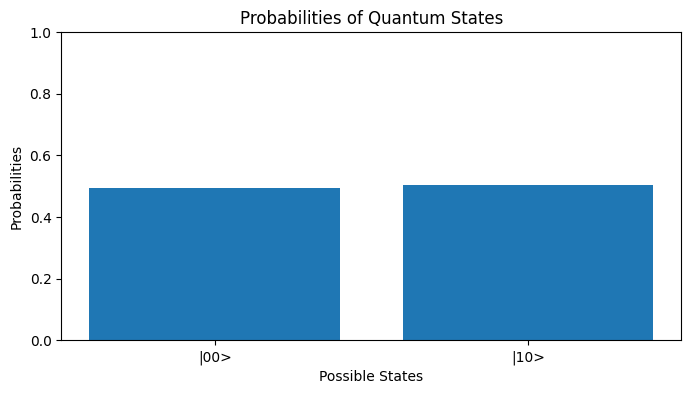

Gráfico de probabilidade para os estados quânticos gerados com sucesso
Estado quântico com maior prbabilidade: |10>
Estado clásico de maior probailidade: 


In [24]:
# verificação do sucesso da operação anterior
result = quantum_circuit.showMeasurement(
    measurement=measurement,
    save=False # desabilita o arquivo de salvamento do circuito
)

result = quantum_circuit.plotMeasurement(
    measurement=measurement,
    bar_values=False # desabilita o arquivo de salvamento do circuito
)

if result: print('Gráfico de probabilidade para os estados quânticos gerados com sucesso')
else: print('Erro na geração do gráfico de probabilidades para os estados quânticos')

quantum_state = quantum_circuit.getMaximumProbabilityState() # captura o estado quântico mais possível

print(f'Estado quântico com maior prbabilidade: {quantum_state}')

classical_state = quantum_circuit.toConvert(state= quantum_state) # Converte o estado quântico em estado clássico

print(f'Estado clásico de maior probailidade: {classical_state}')

## Portas Quânticas pode ser utilizadas como chave de criptografia quântica

### Criptografia de Dados

In [25]:
quantum_circuit = QuantumCircuit(
    architecture=QUANTUM_COMPUTER
)

quantum_circuit.setQubits( # monta a grade quântica
    nqubits=3 # número de qubits utilizados na montagem da grade quântica
)

quantum_circuit.addEncoderText() # porta para codifcação de dados classicos em quânticos

quantum_circuit.addHadamardGATE(qubitIndexName=0) # primeira porta aleatória

quantum_circuit.addPauliZGATE(qubitIndexName=1) # segunda porta aleatória

quantum_circuit.addControlledNOTGATE(qubitIndexName1=0, qubitIndexName2=1) # terceira porta aleatória

quantum_circuit.addToffoliGATE(qubitIndexName1=0, qubitIndexName2=1, qubitIndexName3=2) # quarta porta aleatória

result = quantum_circuit.showCircuit( # exibição do circuito quantico
    save=False # desabilita o arquivo de salvamento do circuito
)

if result: print('Engenharia quântica gravado com sucesso')
else: print('Erro na gravação da engenharia quântica')

|Q0>: ───────#───H───@───@───
             │       │   │
|Q1>: ───────#───Z───X───@───
             │           │
|Q2>: ───────#───────────X───
Engenharia quântica gravado com sucesso


In [31]:
original_text = '123'

quantum_circuit.measurement(
    repetitions=1024, # número de medições, quanto maior mais preciso, porém, mais lento
    qubitIndexNames=[0, 1, 2], # lista com os índices dos qubits, porém, mais lento
    data=original_text # atribuição do conteúdo a ser criptografado
)

encrypted_text = quantum_circuit.getResult()

print(f'Mensagem original: {original_text}')
print(f'Mensagem criptografada: {encrypted_text}')

Mensagem original: 123
Mensagem criptografada: 10011100101011001110010101000011000111001010110011100101010000111110110010101100


### Descriptografia de dados

In [33]:
quantum_circuit = QuantumCircuit( # instanciação do objeto responsável pela criação do circuito
    architecture=QUANTUM_COMPUTER # arquitetura de aceso remoto a máquina quântica
)

quantum_circuit.setQubits( # monta a grade quântica
    nqubits=3 # número de qubits utilizados na grade quântica
)

quantum_circuit.addHadamardGATE(qubitIndexName=0) # primeira porta aleatória
quantum_circuit.addPauliZGATE(qubitIndexName=1) # segunda porta aleatória
quantum_circuit.addControlledNOTGATE(qubitIndexName1=0, qubitIndexName2=1) # terceira porta aleatória
quantum_circuit.addToffoliGATE(qubitIndexName1=0, qubitIndexName2=1, qubitIndexName3=2) # quarta porta aleatória
quantum_circuit.addDecoderText() # porta para decodificação de dados quânticos em clássicos

result = quantum_circuit.showCircuit( # exibição do circuito quântico
    save=False # desabilita o arquivo de ssalvamento do circuito
)

quantum_circuit.measurement(
    repetitions=1024,
    qubitIndexNames=[0, 1, 2], # lista com os índices dos qubits, porém, mais lento,
    data=encrypted_text
)


result = quantum_circuit.getResult()

print(f'Mensagem original: {result}')
print(f'Mensagem criptografada: {encrypted_text}')

|Q0>: ───────H───@───@───§───
                 │   │   │
|Q1>: ───────Z───X───@───§───
                     │   │
|Q2>: ───────────────X───§───
Mensagem original: 123
Mensagem criptografada: 10011100101011001110010101000011000111001010110011100101010000111110110010101100


### Clusterização por Tunelamento Quântico

### Algoritmo de Shor

In [38]:
import random

def generate_nested_list(n):
    result = []
    for _ in range(n):
        a = random.randint(1, 3000)
        b = a * random.randint(2, 10)
        result.append([a, b])
    return result

inputs = generate_nested_list(1000)

if result: print('Engenharia quântica gravada com sucesso')
else: print('Erro na gravação da engenharia quântica')

quantum_circuit = QuantumCircuit(
    architecture=QUANTUM_COMPUTER
)

quantum_circuit.setQubits(
    nqubits = 3
)

for x in inputs: quantum_circuit.addInputData(data=x)

quantum_circuit.addEncoderBarrierX()

quantum_circuit.addQuantumTunnelingBarrier()

quantum_circuit.addQuantumTunnelingBarrier()

quantum_circuit.addDecoderBarrierY()

result = quantum_circuit.showCircuit(
    save=False
)

quantum_circuit.measurement(repetitions=1024)

groups = quantum_circuit.getResult()

for i, group in enumerate(groups): print(f'{i + 1}º {group}')

Engenharia quântica gravada com sucesso
|Q0>: ───────|X>───|───|───|Y>───
             │     │   │   │
|Q1>: ───────|X>───|───|───|Y>───
             │     │   │   │
|Q2>: ───────|X>───|───|───|Y>───
1º [[5, 10], [6, 60], [7, 35], [12, 60], [14, 70], [14, 98], [18, 180], [19, 76], [21, 42], [21, 42], [26, 78], [29, 261], [33, 99], [35, 70], [36, 288], [37, 185], [39, 234], [40, 160], [48, 144], [49, 392], [56, 280], [59, 118], [59, 590], [61, 305], [61, 366], [62, 186], [62, 496], [65, 390], [68, 340], [70, 420], [71, 497], [73, 292], [75, 675], [76, 456], [80, 560], [81, 567], [81, 729], [84, 840], [85, 425], [85, 680], [86, 860], [91, 910], [96, 864], [98, 490], [98, 882], [105, 525], [106, 212], [113, 791], [117, 234], [121, 363], [121, 726], [126, 1008], [127, 1270], [128, 896], [131, 524], [134, 1072], [137, 274], [137, 1096], [139, 417], [139, 1390], [140, 840], [146, 730], [147, 882], [150, 1500], [152, 608], [153, 306], [153, 765], [157, 785], [157, 1570], [159, 1431], [161, 11

### Algoritmo de Shor

In [63]:
import random
from Neuraline.QuantumPhysics.quantum_computing import QUANTUM_COMPUTER
from Neuraline.QuantumPhysics.quantum_algorithms import Shor

shor = Shor(
    architecture=QUANTUM_COMPUTER
)

integer_number = random.randint(1, 600000000)

print(integer_number)

prime_factors = shor.primeNumberFactorization(
    integer=integer_number
)

print(prime_factors)

306159777
[3, 3, 3, 7, 11, 147263]


## Algortimo de simulação quântica

### Algoritmo de simulação para classificação

In [71]:
quantum_simulation = QuantumSimulation(
    architecture=QUANTUM_COMPUTER, #arquitetura de aceso remoto a máquina quêntica
    qubits=5, # número de qubits
    superpositions=0 # numero de qubits definidos no parêmetro anterior, menor deverá ser o o número de qubits
    # Quanto menor o número de sobreposições quânticas, maior será a precisão no resultado
)

print(f'Nível de incerteza no resultado {quantum_simulation.HEISENBERG_UNCERTAINTY}') # incerteza de Heisenberg

inputs = [[1, 2],[10, 20],[100, 200],[3, 4],[30, 40],[300, 400],[5, 6],[50, 60], [500, 600]]

outputs = [[1], [10], [100], [1], [10], [100], [1], [10], [100]]

quantum_simulation.fit(
    inputs=inputs,
    outputs=outputs
)

new_inputs = [[2, 3], [20, 30], [200, 300], [4, 5], [40, 50], [400, 500], [6, 7], [60, 70], [600, 700]]

result_test = quantum_simulation.testINPUTS(
    inputs=new_inputs,
    outputs=outputs
)

print(f'Teste probabilísticos: {result_test}')

new_outputs = quantum_simulation.predict(
    inputs=new_inputs
)

for i, output in enumerate(new_outputs):
    if output[0] < 10: new_outputs[i][0] = 1 # Se for qualquer númento menor que 10 atualiza para 1
    elif output[0] < 100: new_outputs[i][0] = 10 # Se for qualquer número menor que 100 atualiza para 10
    else: new_outputs[i][0] = 100 # Se for qualquer núemro maior ou igual a 100 atualiza para 100

print(f'Resultado classificativo: {new_outputs}') 

Nível de incerteza no resultado 0.0054866192694071345
Teste probabilísticos: {'assertiveness': 0.7455990377220594, 'error': 0.2544009622779406}
Resultado classificativo: [[1], [10], [100], [1], [10], [100], [1], [10], [100]]


## Algoritmode simulação quantica para regresão

In [74]:
quantum_simulation = QuantumSimulation(
    architecture=QUANTUM_COMPUTER, #arquitetura de aceso remoto a máquina quêntica
    qubits=5, # número de qubits
    superpositions=0 # numero de qubits definidos no parêmetro anterior, menor deverá ser o o número de qubits
    # Quanto menor o número de sobreposições quânticas, maior será a precisão no resultado
)

inputs = [[1,2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]]

outputs =[[3], [7], [11], [15], [19], [23], [27], [31], [35], [39]]

quantum_simulation.fit(
    inputs=inputs,
    outputs=outputs
)

new_inputs =[[2, 3], [4, 5], [6, 7]]

result_test = quantum_simulation.testINPUTS(
    inputs=new_inputs, # entrada a ser testada
    outputs=[[5], [9], [13]] # resultado esperado
)

print(f'Teste probabilistico de entrada: {result_test}')

new_outputs = quantum_simulation.predict(
    inputs=new_inputs
)

print(f'Resultado regressivo original (de saída): {new_outputs}')

new_outputs = quantum_simulation.predict(
    inputs=new_inputs,
    convert=int
)

print(f'Resultado regressivo clássico (de saída): {new_outputs}')

new_outputs =[[5], [9], [13]]

# Testa os resultados das saídas: assertiveness: percentual de assertividade; error: percetual de erro
# o teste é feito com base nas respostas originais sem conversão
result_test = quantum_simulation.testOUTPUTS(
    inputs=new_outputs, # saídas a serem testadas
    outputs=new_inputs # resultados esperados
)

print(f'Teste probabilistico das saídas: {result_test}')

new_inputs = quantum_simulation.predict( # método de predição de estados quanticos como clássicos
    outputs=new_outputs, # atribuição da matriz de entrada
    convert=int # converte os valores de resposta para um tipo específico
)

print(f'Resultado regressivo convertido (de entrada): {new_inputs} ')

Teste probabilistico de entrada: {'assertiveness': 0.9930438847271191, 'error': 0.0069561152728808695}
Resultado regressivo original (de saída): [[4.998633776929801], [8.867881371603543], [12.938665572400293]]
Resultado regressivo clássico (de saída): [[5], [9], [13]]
Teste probabilistico das saídas: {'assertiveness': 0.996238221688178, 'error': 0.003761778311822006}
Resultado regressivo convertido (de entrada): [[2, 3], [4, 5], [6, 7]] 


## Algoritmo de simulaço quântica para sequenciamento

In [78]:
quantum_simulation = QuantumSimulation(
    architecture=QUANTUM_COMPUTER, #arquitetura de aceso remoto a máquina quêntica
    qubits=5, # número de qubits
    superpositions=0 # numero de qubits definidos no parêmetro anterior, menor deverá ser o o número de qubits
    # Quanto menor o número de sobreposições quânticas, maior será a precisão no resultado
)

print(f'Nível de incerteza no resultado {quantum_simulation.HEISENBERG_UNCERTAINTY}') # incerteza de Heisenberg

inputs = [[1,2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]]

quantum_simulation.fit( # métod de treinamento de circuitos de simulaçao quântica
    inputs=inputs,
)

new_inputs = quantum_simulation.predictSequence(# método de medição dos estados quânticos como clássicos
    predictions=2, # atribuição do número de resultados preditivos da resposta
)

print(f'Resultado regressivo original: {new_inputs}') # exibição do resultado

quantum_simulation.HEISENBERG_UNCERTAINTY = 0 # zera a incerteza de heisenberg para a precisão inteira

new_inputs = quantum_simulation.predictSequence(# método de medição dos estados quânticos como clássicos
    predictions=2, # saídas a serem testadas
    convert=int # converte os valores de resposta para um tipo específico
)

print(f'Resultado regressivo convertido: {new_inputs}') # exibição do resultado preditivo

Nível de incerteza no resultado 0.00015995533724612375
Resultado regressivo original: [[20.999840180600923, 21.89004654225234], [22.885139528205848, 23.77060928494927]]
Resultado regressivo convertido: [[21, 22], [23, 24]]


### Salvamento e carregamento de dados pré-treinados

#### Salvamento do modelo simulado

In [79]:
quantum_simulation = QuantumSimulation(
    architecture=QUANTUM_COMPUTER, #arquitetura de aceso remoto a máquina quêntica
    qubits=5, # número de qubits
    superpositions=0 # numero de qubits definidos no parêmetro anterior, menor deverá ser o o número de qubits
    # Quanto menor o número de sobreposições quânticas, maior será a precisão no resultado
)

print(f'Nível de incerteza no resultado {quantum_simulation.HEISENBERG_UNCERTAINTY}') # incerteza de Heisenberg

inputs = [[1,2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]]

outputs =[[3, 3], [7, 7], [11, 11], [15, 15], [19, 19], [23, 23], [27, 27], [31, 31], [35, 35], [39, 39]]

quantum_simulation.fit(
    inputs=inputs,
    outputs=outputs
)

result = quantum_simulation.saveModel(
    url_path='modelo_simulado'
)

if result: print('Modelo quântico salvo com sucesso')
else: print('Erro ao salvar modelo quântico')

Nível de incerteza no resultado 0.0014196955174296878
Modelo quântico salvo com sucesso


#### Carregamento do modelo simulado

In [82]:
quantum_simulation = QuantumSimulation()

result = quantum_simulation.loadModel(
    url_path='modelo_simulado'
)

if result: print('Modelo quântico carregado com sucesso')
else: print('Erro ao carregar modelo quântico')

new_inputs =[[2, 3], [4, 5], [6, 7]]

new_outputs = quantum_simulation.predict(
    inputs=new_inputs,
    convert=int
)

print(f'Resultado regressivo convertido: {new_outputs}')

Modelo quântico carregado com sucesso
Resultado regressivo convertido: [[5, 5], [9, 9], [170, 170]]


## Simulação quântica de uma apçlicação do mundo real

Nível de incerteza no resultado 0.006402086382972396


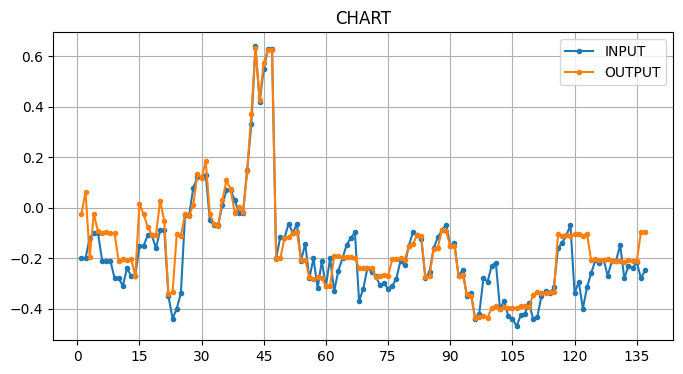

(Simulação quântica treinada, executada e plotada com sucesso)


In [86]:
from Neuraline.QuantumPhysics.quantum_computing import QUANTUM_COMPUTER
from Neuraline.QuantumPhysics.quantum_simulation import QuantumSimulation
from Neuraline.Utilities.data import DataExploration
from Neuraline.Utilities.chart import Chart

data_exploration, chart = DataExploration(), Chart()

quantum_simulation = QuantumSimulation(
    architecture=QUANTUM_COMPUTER, #arquitetura de aceso remoto a máquina quêntica
    qubits=5, # número de qubits
    superpositions=0 # numero de qubits definidos no parêmetro anterior, menor deverá ser o o número de qubits
    # Quanto menor o número de sobreposições quânticas, maior será a precisão no resultado
)

print(f'Nível de incerteza no resultado {quantum_simulation.HEISENBERG_UNCERTAINTY}') # incerteza de Heisenberg

url_data = 'https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv'
# colunas na tabela da fonte de dados:
# Source: fonte da informação
# Year: ano em que a temperatura média foi calculada
# Mean: temperatura média do planeta em graus celsius
# separa um percentual dos dados para teste e outro para treinamento
x_training, y_training, x_test, y_test = data_exploration.dataSeparationCSV( # separação dos dados em listas
    url_path=url_data, # atribuição do endereço do arquivo de dados
    list_inputs=['Year'], # título da coluna de entrada
    list_outputs=['Mean'], # título da coluna de saída
    training_percentage=.5, # 50% dos dados para treinamento
    test_percentage=.5 # 50% dos dados para teste
)

# treinamento da simulação para a abstração dos padrões
quantum_simulation.fit( # método de treinamento do circuito de simulação quântica
    inputs=x_training, # atribuição da matriz de entrada do treinamento
    outputs=y_training # atribuição da matriz de saída do treinamento
) # se o modelo for salvo com o método saveModel não precisará ser treinado novamente
# predição da simulação para a aplicação dos padrões abstraídos no treinamento
new_outputs = quantum_simulation.predict( # método de medição dos estados quânticos como clássicos
    inputs=x_test # atribuição da matriz de entrada da predição
)
# plotagem comparativa entre os dados esperados (teste) com os dados preditos (resultado)
chart.plotMATRIX( # plotagem do gráfico de linhas
    matrix1=y_test, # atribuição da lista com os dados esperados (linha azul/INPUT)
    matrix2=new_outputs # atribuição da lista com os dados preditos (linha laranja/OUTPUT)
)
if len(new_outputs) > 0: print('(Simulação quântica treinada, executada e plotada com sucesso)')
else: print('(Erro ao treinar, executar e/ou plotar a simulação quântica)')



In [87]:
# CÓDIGO PARA SIMULAÇÃO DE BURACOS NEGROS POR MEIO DE CÁLCULOS FÍSICO-MATEMÁTICOS
from Neuraline.ComputationalPhysics.black_hole_simulation import BlackHoleSimulation # importa o algoritmo de Simulação de Buracos Negros do módulo de Física Computacional
BLACK_HOLE_BLACK_BODY_ACCRETION_LEVEL = 1.0 # nível de acreção do corpo negro em graus percentuais de 0 (0%) a 1 (100%).
BLACK_HOLE_SPACE_TEMPERATURE_LEVEL = 0.0 # nível da temperatura espacial em relação ao buraco negro de 0 (0%) a 1 (100%).
BLACK_HOLE_BLACK_BODY_EXTERNAL_TEMPERATURE = 60.0 # temperatura externa do corpo negro em nanokelvins.
VISIBLE_LIGHT_SPECTRUM = 370.0 # espectro da luz visível emitida pela acreção de matéria em nanômetros.
BLACK_HOLE_ACCRETION_RADIUS = 1.5 # medida do raio de acreção em radianos.
BLACK_HOLE_ACCRETION_WIDTH = 10.0 # largura de expansão da acreção do buraco negro em dias-luz.
BLACK_HOLE_ACCRETION_GLOW_LEVEL = 0.9 # nível do brilho total causado pela acreção em graus percentuais de 0 (0%) a 1 (100%).
BLACK_HOLE_ACCRETION_TEMPERATURE = 1000000.0 # temperatura de acreção do buraco negro em kelvins.
STARS_GLOW_LEVEL = 1.0 # nível do brilho das estrelas no campo de visão em graus percentuais de 0 (0%) a 1 (100%).
GALAXY_GLOW_LEVEL = 0.4 # nível do brilho da galáxia no campo de visão em graus percentuais de 0 (0%) a 1 (100%).
LEVEL_OF_PLANETARY_ENVIRONMENTAL_IMPACT = 0.1 # nível de brilho do orbital (lua/planeta) causado pelo impacto ambiental no campo de visão em percentuais de 0 (0%) a 1 (100%).
PLANETARY_LUMINOSITY_LEVEL = 1.5 # nível de luminosidade orbital/planetária em graus percentuais de 0 (0%) a 1 (100%).
BLACK_HOLE_N_STEPS = 100 # número de quadros de uma simulação matemática para outra.
BLACK_HOLE_QUALITY = 'medium' # qualidade da simulação, poderá ser medium (qualidade média com processamento médio), fast (qualidade baixa com processamento rápido), high (qualidade alta com processamento lento e alta demanda por hardware).
BLACK_HOLE_ACCRETION_DISK = True # se True, exibirá o disco de acreção, se False, colocará o disco de acreção fora do espectro da luz visível.
PLANET_ENABLED = False # se True, exibirá um orbital (planeta genérico) orbitando o buraco negro, se False, não exibirá o orbital/planeta.
PLANET_DISTANCE = 7.0 # distância do orbital/planeta em relação ao buraco negro em dias-luz.
PLANET_RADIUS = 0.4 # medida do orbital/planeta em radianos.
BLACK_HOLE_LORENTZ_CONTRACTION = True # se True, usará o cálculo da contração de Lorentz-FitzGerald, se False, irá ignorar a contração de Lorentz-FitzGerald.
BLACK_HOLE_GRAVITATIONAL_TIME_DILATION = True # se True, usará o cálculo da dilatação gravitacional do tempo, se False, irá ignorar o cálculo da dilatação do tempo.
BLACK_HOLE_ABERRATION = True # se True, habilitará o fenômeno de aberração, se False, irá ignorar o cálculo de aberração.
BLACK_HOLE_BEAMATION = True # se True, permitirá a transmissão de informação e energia, se False, irá ignorar o cálculo de transmissão.
BLACK_HOLE_DOPPLER_SHIFT = True # se True, usará o cálculo do efeito de deslocamento Doppler, se False, irá ignorar o deslocamento Doppler.
BLACK_HOLE_LIGHT_TRAVEL_TIME = True # se True, usará o cálculo do deslocamento da luz, se False, irá ignorar o cálculo do deslocamento da luz.
BLACK_HOLE_TIME_SCALE = 1.0 # escala temporal do horizonte de eventos em relação ao observador em graus percentuais de 0 (0%) a 1 (100%).
OBSERVER_MOTION = True # se True, habilitará o movimento do observador, se False, irá ignorar o movimento do observador.
OBSERVER_DISTANCE = 11.0 # distância do observador em relação ao disco de acreção na escala de dias-luz.
OBSERVER_ORBITAL_INCLINATION = -10.0 # grau de inclinação orbital do observador.
black_hole = BlackHoleSimulation( # executa a simulação do Buraco Negro através dos cálculos de Astrofísica habilitados ou desabilitados acima.
	BLACK_HOLE_BLACK_BODY_ACCRETION_LEVEL=BLACK_HOLE_BLACK_BODY_ACCRETION_LEVEL, # atribuição do nível de acreção do corpo negro.
	BLACK_HOLE_SPACE_TEMPERATURE_LEVEL=BLACK_HOLE_SPACE_TEMPERATURE_LEVEL, # atribuição do nível de temperatura espacial.
	BLACK_HOLE_BLACK_BODY_EXTERNAL_TEMPERATURE=BLACK_HOLE_BLACK_BODY_EXTERNAL_TEMPERATURE, # atribuição da temperatura externa em nanokelvins.
	VISIBLE_LIGHT_SPECTRUM=VISIBLE_LIGHT_SPECTRUM, # atribuição do espectro de luz visível em nanômetros.
	BLACK_HOLE_ACCRETION_RADIUS=BLACK_HOLE_ACCRETION_RADIUS, # atribuição dos radianos da acreção.
	BLACK_HOLE_ACCRETION_WIDTH=BLACK_HOLE_ACCRETION_WIDTH, # atribuição da largura de expansão da acreção em dias-luz.
	BLACK_HOLE_ACCRETION_GLOW_LEVEL=BLACK_HOLE_ACCRETION_GLOW_LEVEL, # atribuição do nível do brilho de acreção.
	BLACK_HOLE_ACCRETION_TEMPERATURE=BLACK_HOLE_ACCRETION_TEMPERATURE, # atribuição da temperatura causada pela acreção em kelvins.
	STARS_GLOW_LEVEL=STARS_GLOW_LEVEL, # atribuição do nível de brilho das estrelas.
	GALAXY_GLOW_LEVEL=GALAXY_GLOW_LEVEL, # atribuição do nível de brilho da galáxia.
	LEVEL_OF_PLANETARY_ENVIRONMENTAL_IMPACT=LEVEL_OF_PLANETARY_ENVIRONMENTAL_IMPACT, # atribuição do impacto ambiental no corpo orbital.
	PLANETARY_LUMINOSITY_LEVEL=PLANETARY_LUMINOSITY_LEVEL, # atribuição do nível de luminosidade do corpo orbital.
	BLACK_HOLE_N_STEPS=BLACK_HOLE_N_STEPS, # atribuição do número referente a quantidade de quadros por simulação computacional.
	BLACK_HOLE_QUALITY=BLACK_HOLE_QUALITY, # atribuição da qualidade da simulação computacional.
	BLACK_HOLE_ACCRETION_DISK=BLACK_HOLE_ACCRETION_DISK, # atribuição do estado do disco de acreção.
	PLANET_ENABLED=PLANET_ENABLED, # atribuição do estado do corpo orbital.
	PLANET_DISTANCE=PLANET_DISTANCE, # atribuição da distância do corpo orbital em dias-luz.
	PLANET_RADIUS=PLANET_RADIUS, # atribuição da medida do corpo orbital
	BLACK_HOLE_LORENTZ_CONTRACTION=BLACK_HOLE_LORENTZ_CONTRACTION, # atribuição do estado da contração de Lorentz-FitzGerald.
	BLACK_HOLE_GRAVITATIONAL_TIME_DILATION=BLACK_HOLE_GRAVITATIONAL_TIME_DILATION, # atribuição do estado de dilatação gravitacional do tempo.
	BLACK_HOLE_ABERRATION=BLACK_HOLE_ABERRATION, # atribuição do estado da aberração.
	BLACK_HOLE_BEAMATION=BLACK_HOLE_BEAMATION, # atribuição do estado de transmissão de informação e energia representado por iluminação.
	BLACK_HOLE_DOPPLER_SHIFT=BLACK_HOLE_DOPPLER_SHIFT, # atribuição do estado de deslocamento Doppler.
	BLACK_HOLE_LIGHT_TRAVEL_TIME=BLACK_HOLE_LIGHT_TRAVEL_TIME, # atribuição do estado de viagem da luz no tempo.
	BLACK_HOLE_TIME_SCALE=BLACK_HOLE_TIME_SCALE, # atribuição do nível de escala temporal distorcida pelo poço gravitacional.
	OBSERVER_MOTION=OBSERVER_MOTION, # atribuição do estado de movimentação do observador.
	OBSERVER_DISTANCE=OBSERVER_DISTANCE, # atribuição da distância do observador em dias-luz.
	OBSERVER_ORBITAL_INCLINATION=OBSERVER_ORBITAL_INCLINATION # atribuição do grau de inclinação do observador.
) # parâmetros de inicialização da simulação computacional.
ARTIFICIAL_NEURAL_NETWORK, QUANTUM_SIMULATION = False, True # habilitação dos recursos matemáticos aplicados a simulação
black_hole_result = black_hole.run( # execução da simulação computacional utilizando os cálculos dos parâmetros de inicialização.
	ARTIFICIAL_NEURAL_NETWORK=ARTIFICIAL_NEURAL_NETWORK, # atribuição do estado de utilização de redes neurais artificiais na simulação.
	QUANTUM_SIMULATION=QUANTUM_SIMULATION # atribuição do estado de utilização de cálculos de otimização quântica na simulação.
)# parâmetros de execução da simulação computacional.
# estado da simulação, se True a simulação terá sido construída com sucesso, caso contrário poderão existir erros de configuração.
if black_hole_result: print('Simulação de buraco negro executada com sucesso.') # exibição da mensagem de sucesso na operação
else: print('Erro na execução da simulação de buraco negro.') # exibição da mensagem de fracasso na operação

Traceback (most recent call last):
  File "src/gevent/greenlet.py", line 908, in gevent._gevent_cgreenlet.Greenlet.run
  File "/home/miller/.local/lib/python3.10/site-packages/eel/__init__.py", line 194, in run_lambda
    btl.run(
  File "/home/miller/.local/lib/python3.10/site-packages/bottle.py", line 3175, in run
    server.run(app)
  File "/home/miller/.local/lib/python3.10/site-packages/bottle_websocket/server.py", line 17, in run
    server.serve_forever()
  File "/home/miller/.local/lib/python3.10/site-packages/gevent/baseserver.py", line 398, in serve_forever
    self.start()
  File "/home/miller/.local/lib/python3.10/site-packages/gevent/baseserver.py", line 336, in start
    self.init_socket()
  File "/home/miller/.local/lib/python3.10/site-packages/gevent/pywsgi.py", line 1668, in init_socket
    StreamServer.init_socket(self)
  File "/home/miller/.local/lib/python3.10/site-packages/gevent/server.py", line 173, in init_socket
    self.socket = self.get_listener(self.address,

Simulação de buraco negro executada com sucesso.
